In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json



accident_csv = "./accident.csv"
person_csv = "./person.csv"
vehicle_csv = "./vehicle.csv"

accident_df = pd.read_csv(accident_csv)
person_df = pd.read_csv(person_csv)
vehicle_df = pd.read_csv(vehicle_csv)

/var/folders/g1/_j2d8jxs3c7_lb7t6vlb5r0c0000gn/T/ipykernel_57280/3327391912.py:14: DtypeWarning: Columns (72,73,74,75,82,83,85,89,90,94) have mixed types. Specify dtype option on import or set low_memory=False.
  person_df = pd.read_csv(person_csv)
/var/folders/g1/_j2d8jxs3c7_lb7t6vlb5r0c0000gn/T/ipykernel_57280/3327391912.py:15: DtypeWarning: Columns (102,103,104,107,108,109,110,117,118,120,125,126,129) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv(vehicle_csv)


In [4]:
county_city_year_df = accident_df[["county_name", "city_name", "YEAR"]]
county_city_year_df.head()


,county_name,city_name,YEAR
0,PIMA,NONE LISTED,2012
1,YAVAPAI,CLARKDALE,2012
2,MARICOPA,PHOENIX,2012
3,MARICOPA,GILBERT,2012
4,PIMA,TUCSON,2012


In [5]:
total_accidents = county_city_year_df.value_counts(["county_name", "YEAR"]).reset_index()
total_accidents_filtered = total_accidents[~total_accidents["county_name"].isin(["999"])]
total_accidents_filtered

,county_name,YEAR,count
0,MARICOPA,2016,190
1,MARICOPA,2013,147
2,MARICOPA,2014,145
3,MARICOPA,2015,138
4,MARICOPA,2012,137
...,...,...,...
70,GRAHAM,2013,1
71,GRAHAM,2012,1
72,SANTA CRUZ,2014,1
73,GREENLEE,2014,1


In [6]:
#Trying to chart Year to Year Accident Data by County
#x_axis = np.arange(len(total_accidents_filtered))
#tick_locations = [value for value in x_axis]
#plt.figure(figsize=(20,4))
#plt.bar(x_axis, total_accidents_filtered["count"], color=["red","blue","green","yellow"], alpha=0.5, align="edge")
#plt.xticks(tick_locations, total_accidents_filtered["county_name"], rotation_mode="anchor", rotation=45, ha="right")
#plt.title("Fatal Accidents per County 2012-2016")
#plt.xlabel("County")
#plt.ylabel("Fatal Accidents")
#plt.legend(loc="best")
#plt.show

In [7]:
ccy_12_df = county_city_year_df.loc[county_city_year_df["YEAR"] == 2012, ["county_name", "city_name", "YEAR"]]
print(ccy_12_df)

    county_name    city_name  YEAR
0          PIMA  NONE LISTED  2012
1       YAVAPAI    CLARKDALE  2012
2      MARICOPA      PHOENIX  2012
3      MARICOPA      GILBERT  2012
4          PIMA       TUCSON  2012
..          ...          ...   ...
378         999      UNKNOWN  2012
379      APACHE  NONE LISTED  2012
380      APACHE  NONE LISTED  2012
381      NAVAJO  NONE LISTED  2012
382      APACHE  NONE LISTED  2012

[383 rows x 3 columns]


In [8]:
accidents = ccy_12_df["county_name"].value_counts().reset_index()
accidents.columns=["county_name", "Totals"]
accidents_filtered = accidents[~accidents["county_name"].isin(["999"])]
accidents_filtered

,county_name,Totals
0,MARICOPA,137
1,PIMA,56
2,PINAL,33
3,APACHE,31
4,COCONINO,25
5,YAVAPAI,21
6,NAVAJO,17
7,MOHAVE,15
8,YUMA,12
9,GILA,11


<function matplotlib.pyplot.show(close=None, block=None)>

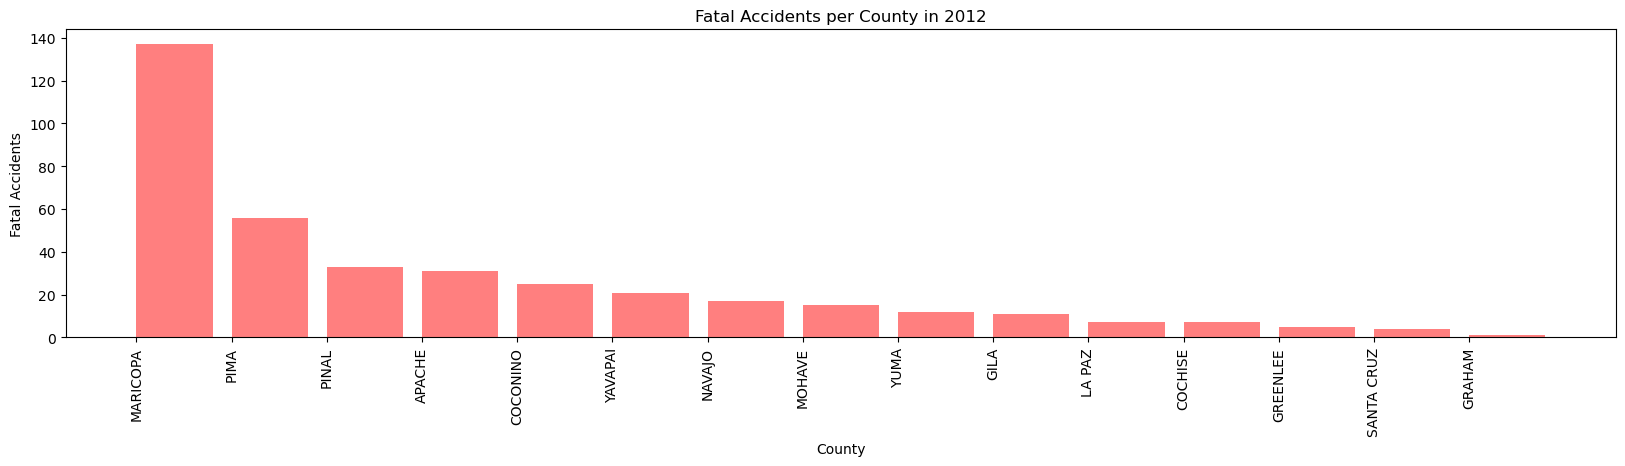

In [9]:

x_axis = np.arange(len(accidents_filtered))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, accidents_filtered["Totals"], color="red", alpha=0.5, align="edge")
plt.xticks(tick_locations, accidents_filtered["county_name"], rotation="vertical")
plt.title("Fatal Accidents per County in 2012")
plt.xlabel("County")
plt.ylabel("Fatal Accidents")
plt.show

In [10]:
city_12_df = county_city_year_df.loc[county_city_year_df["YEAR"] == 2012, ["county_name", "city_name", "YEAR"]]
accidents_city = city_12_df["city_name"].value_counts().reset_index()
accidents_city.columns=["city_name", "Totals"]
#accidents_filtered = accidents[~accidents["county_name"].isin(["999"])]
accidents_city

,city_name,Totals
0,NONE LISTED,182
1,PHOENIX,53
2,TUCSON,24
3,MESA,14
4,GLENDALE,12
5,CHANDLER,10
6,YUMA,6
7,GILBERT,6
8,PEORIA,5
9,PRESCOTT,5


In [ ]:
city_12_df = county_city_year_df.loc[county_city_year_df["YEAR"] == 2012, ["county_name", "city_name", "YEAR"]]
accidents = ccy_13_df["city_name"].value_counts().reset_index()
accidents.columns=["city_name", "Totals"]
accidents_filtered = accidents[~accidents["city_name"].isin(["999"])]
x_axis = np.arange(len(accidents_filtered))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, accidents_filtered["Totals"], color="red", alpha=0.5, align="edge")
plt.xticks(tick_locations, accidents_filtered["city_name"], rotation="vertical")
plt.title("Fatal Accidents per County in 2012")
plt.xlabel("County")
plt.ylabel("Fatal Accidents")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

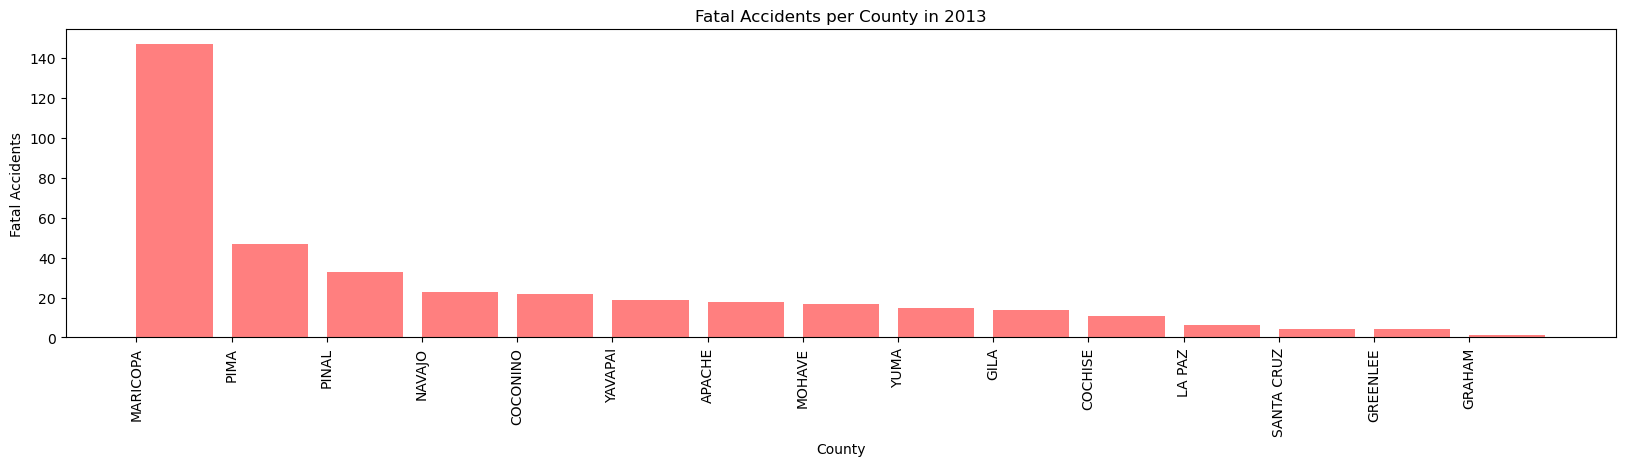

In [9]:
ccy_13_df = county_city_year_df.loc[county_city_year_df["YEAR"] == 2013, ["county_name", "city_name", "YEAR"]]
accidents = ccy_13_df["county_name"].value_counts().reset_index()
accidents.columns=["county_name", "Totals"]
accidents_filtered = accidents[~accidents["county_name"].isin(["999"])]
x_axis = np.arange(len(accidents_filtered))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, accidents_filtered["Totals"], color="red", alpha=0.5, align="edge")
plt.xticks(tick_locations, accidents_filtered["county_name"], rotation="vertical")
plt.title("Fatal Accidents per County in 2013")
plt.xlabel("County")
plt.ylabel("Fatal Accidents")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

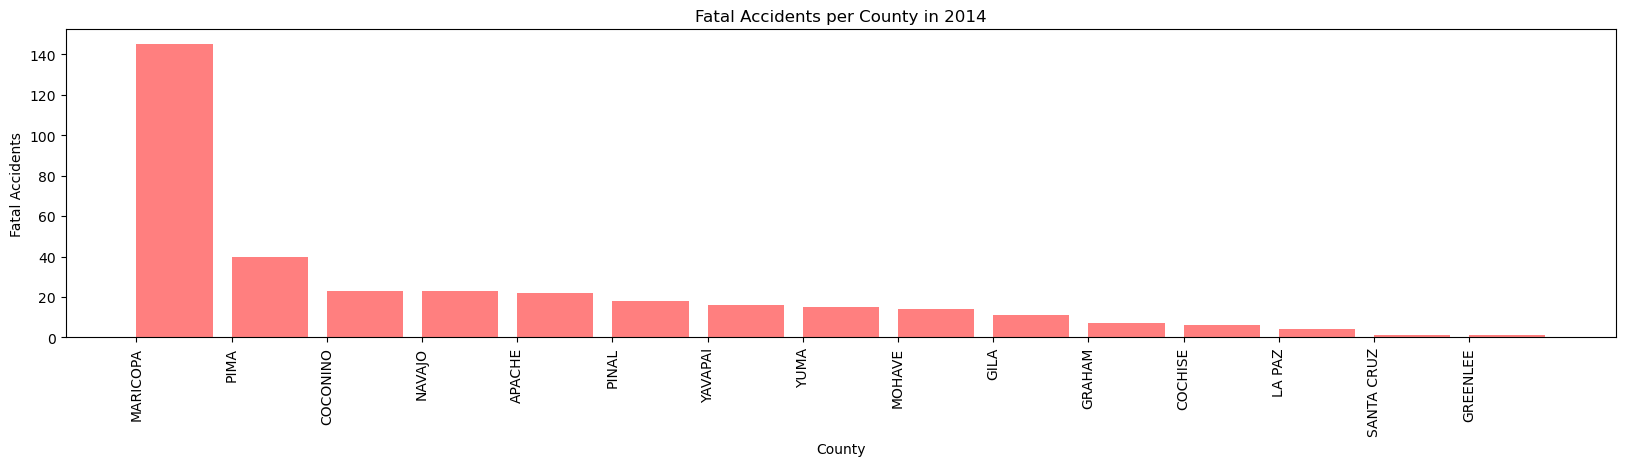

In [10]:
ccy_14_df = county_city_year_df.loc[county_city_year_df["YEAR"] == 2014, ["county_name", "city_name", "YEAR"]]
accidents = ccy_14_df["county_name"].value_counts().reset_index()
accidents.columns=["county_name", "Totals"]
accidents_filtered = accidents[~accidents["county_name"].isin(["999"])]
x_axis = np.arange(len(accidents_filtered))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, accidents_filtered["Totals"], color="red", alpha=0.5, align="edge")
plt.xticks(tick_locations, accidents_filtered["county_name"], rotation="vertical")
plt.title("Fatal Accidents per County in 2014")
plt.xlabel("County")
plt.ylabel("Fatal Accidents")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

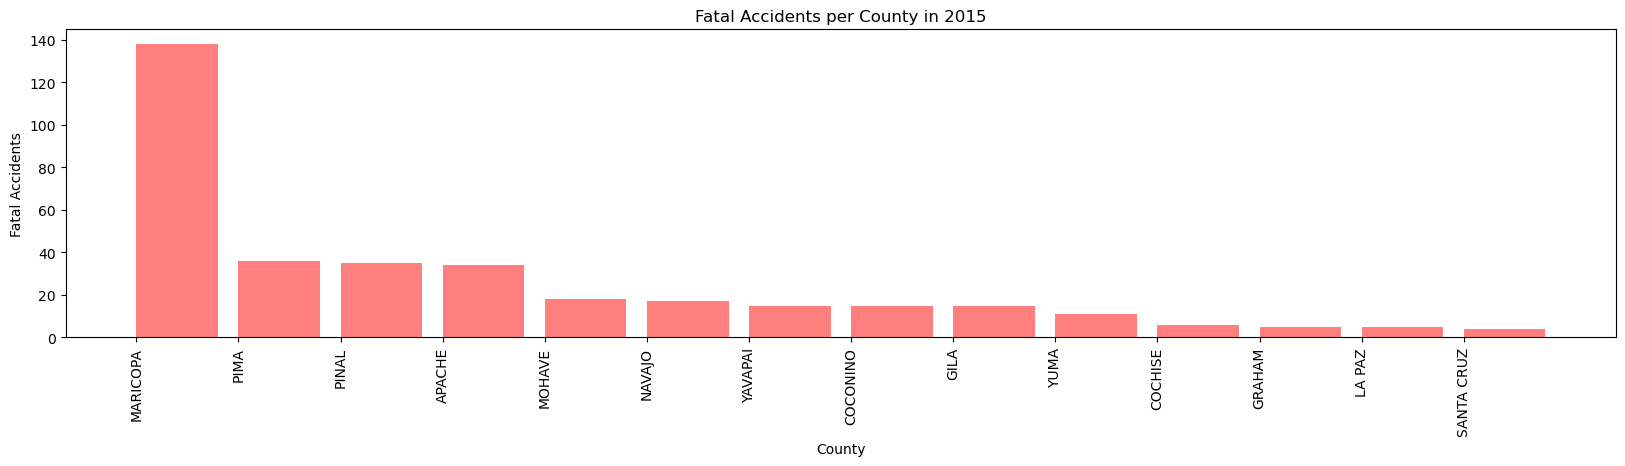

In [11]:
ccy_15_df = county_city_year_df.loc[county_city_year_df["YEAR"] == 2015, ["county_name", "city_name", "YEAR"]]
accidents = ccy_15_df["county_name"].value_counts().reset_index()
accidents.columns=["county_name", "Totals"]
accidents_filtered = accidents[~accidents["county_name"].isin(["999"])]
x_axis = np.arange(len(accidents_filtered))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, accidents_filtered["Totals"], color="red", alpha=0.5, align="edge")
plt.xticks(tick_locations, accidents_filtered["county_name"], rotation="vertical")
plt.title("Fatal Accidents per County in 2015")
plt.xlabel("County")
plt.ylabel("Fatal Accidents")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

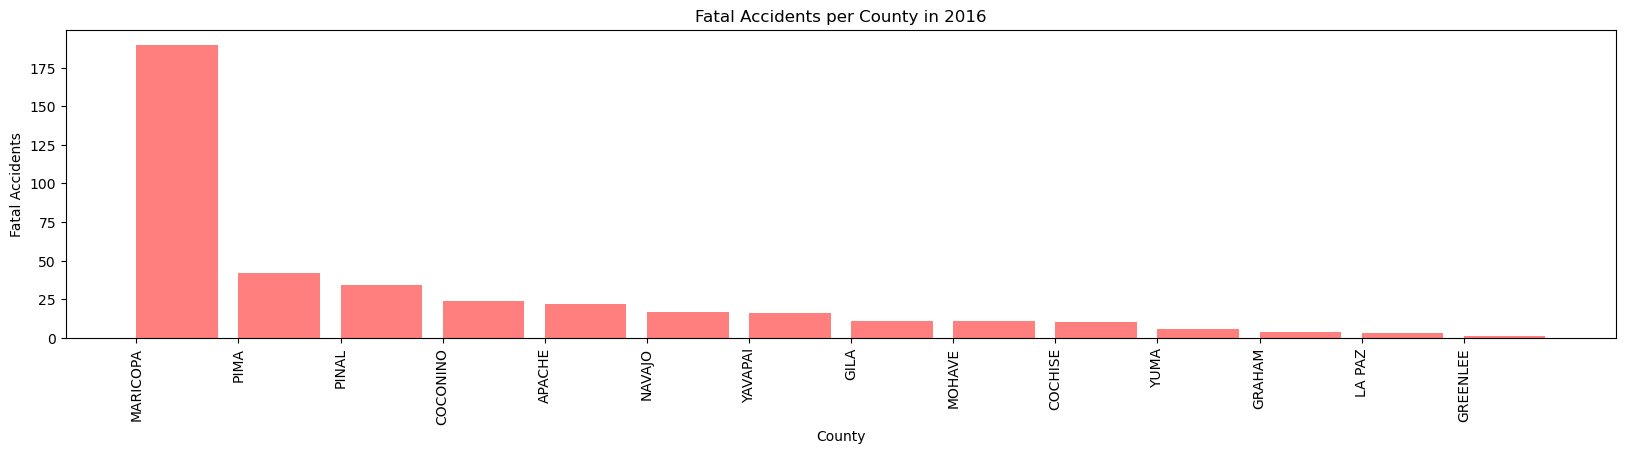

In [12]:
ccy_16_df = county_city_year_df.loc[county_city_year_df["YEAR"] == 2016, ["county_name", "city_name", "YEAR"]]
accidents = ccy_16_df["county_name"].value_counts().reset_index()
accidents.columns=["county_name", "Totals"]
accidents_filtered = accidents[~accidents["county_name"].isin(["999"])]
x_axis = np.arange(len(accidents_filtered))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, accidents_filtered["Totals"], color="red", alpha=0.5, align="edge")
plt.xticks(tick_locations, accidents_filtered["county_name"], rotation="vertical")
plt.title("Fatal Accidents per County in 2016")
plt.xlabel("County")
plt.ylabel("Fatal Accidents")
plt.show

In [18]:
#geoapify_key = "b9ab500b0daa4c55a17cdfe23fba2e1c"
import hvplot.pandas
map_plot = accident_df.hvplot.points(
    "LONGITUD",
    "LATITUDE",
    geo=True,
    size=0.5,
    scale=2,
    color="red",
    alpha=0.5,
    tiles ="OSM",
    frame_width=700,
    frame_height=700
)
#alpha - opacity of dots
#size - base size
#scale - change related to other info
# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONGITUD,LATITUDE]

In [16]:
accident_df["weather_lit"].value_counts()

weather_lit
Clear                1305
Unknown               221
Cloudy                167
Not Reported          120
Rain                   40
Snow                    3
Blowing Snow            1
Sleet or Hail           1
Severe Crosswinds       1
Other                   1
Name: count, dtype: int64

In [8]:
accident_df["lgt_cond_lit"].value_counts()

lgt_cond_lit
Daylight                   815
Dark - Not Lighted         336
Dark - Lighted             335
Unknown                    130
Dark - Unknown Lighting    128
Dusk                        64
Dawn                        46
Not Reported                 6
Name: count, dtype: int64

In [10]:
accident_df["a_tod_lit"].value_counts()

a_tod_lit
Nighttime    889
Daytime      872
Unknown       99
Name: count, dtype: int64

In [12]:
accident_df["a_spcra_lit"].value_counts()

a_spcra_lit
Other Crash                1223
Speeding Involved Crash     637
Name: count, dtype: int64

In [16]:
accident_df["a_ped_lit"].value_counts()

a_ped_lit
Other Crash                  1510
Pedestrian Involved Crash     350
Name: count, dtype: int64

In [18]:
accident_df["a_posbac_lit"].value_counts()

a_posbac_lit
Unknown BAC Crash                          878
All Drivers With ZERO BAC Testing Crash    517
Driver With Positive BAC Testing Crash     465
Name: count, dtype: int64

In [20]:
accident_df["a_dist_lit"].value_counts()

a_dist_lit
Other Crash                      1698
Involving a Distracted Driver     162
Name: count, dtype: int64

In [24]:
accident_df["HOUR"].value_counts()

HOUR
18    140
20    136
17    113
19    108
16    103
99     99
15     91
21     80
11     79
22     73
13     73
6      70
23     69
12     63
14     63
7      63
5      62
0      54
9      52
10     51
2      51
8      51
1      48
3      38
4      30
Name: count, dtype: int64

In [30]:
accident_df["TWAY_ID"].value_counts()

TWAY_ID
US-191                        48
UNKNOWN RD                    36
SR-87                         33
MCDOWELL RD                   33
SR-264                        29
                              ..
CAMINO DE OESTE                1
OUTER LOOP RD                  1
COUNTY 15TH ST                 1
LENZER AVE                     1
INDIAN ROUTE 121- ASPEN RD     1
Name: count, Length: 881, dtype: int64

In [32]:
accident_df["a_dow_lit"].value_counts()

a_dow_lit
Weekday    1001
Weekend     833
Unknown      26
Name: count, dtype: int64

In [34]:
accident_df["a_spcra_lit"].value_counts()

a_spcra_lit
Other Crash                1223
Speeding Involved Crash     637
Name: count, dtype: int64